<a href="https://colab.research.google.com/github/VilchisKarla/Investigacion-de-Operaciones/blob/main/TableroCircular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO** Tablero Circular

Lanzamos 2 monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento. ¿Son todos los sectores igualmente probables cuando pasa mucho tiempo?


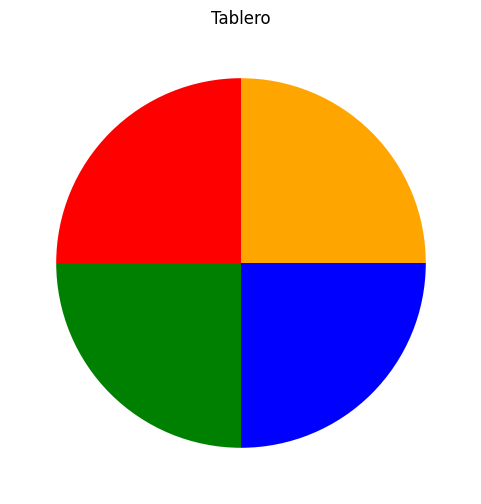

In [ ]:
import matplotlib.pyplot as plt

# Configuración del plano
fig, ax = plt.subplots(figsize=(6, 6))

# Datos para los sectores
sizes = [90, 90, 90, 90]  # 4 sectores de 90° cada uno
colors = ['orange', 'blue', 'green', 'red']
labels = ['Naranja', 'Azul', 'Verde', 'Rojo']

# Crear el gráfico de pastel
ax.pie(sizes, colors=colors, startangle=90, counterclock=False)
plt.title('Tablero')
# Mostrar el gráfico
plt.show()

# **Solución Analítica**

nuestra variable de estado es la posición de la ficha. --> $x$

Los posibles estados de las monedas son:

$\frac{1}{4}$ {Sol, Sol}

$\frac{1}{2}$ {Sol,Águila},{Águila, Sol}

$\frac{1}{4}$ {Águila, Águila}

Entonces, sean:

$x_n$:probabilidad de estar en el sector naranja tras n tiros

$y_n$:probabilidad de estar en el sector azul tras n tiros

$z_n$:probabilidad de estar en el sector verde tras n tiros

$t_n$:probabilidad de estar en el sector rojo tras n tiros


Utilizando el teorema de la probabiliad total
$$P(A) = \sum_{i=1}^m P(A|B_i)P(B_i)$$

llegamos a la siguiente expresión:

$$\begin{bmatrix} x_n \\
y_n\\
z_n\\
t_n \end{bmatrix} = \begin{bmatrix} \frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{2}{4} & \frac{1}{4} & 0 & \frac{1}{4}\\
\frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0\\
0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4} \end{bmatrix} \begin{bmatrix} x_{n-1} \\
y_{n-1}\\
z_{n-1}\\
t_{n-1} \end{bmatrix}$$

Es decir, tenemos un sistema $X_n=AX_{n-1}$ que en general es $X_n=A^nX_0$

Para resolver el problema  bastaría con calcular $A^n$

Veamos que para n=30 ya tendremos la solución exacta

In [ ]:
import numpy as np

# Definir la matriz A
A = np.array([
    [0.25, 0.00, 0.25, 0.50],
    [0.50, 0.25, 0.00, 0.25],
    [0.25, 0.50, 0.25, 0.00],
    [0.00, 0.25, 0.50, 0.25]
])

# Función para elevar la matriz A a la potencia n
def matriz_potencia(A, n):
    return np.linalg.matrix_power(A, n)

# Ejemplo: calcular A^30
n = 30
A_n = matriz_potencia(A, n)

print(f"A^{n} =\n", A_n)


A^30 =
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


# **Cálculo con las ecuaciones**

Plantearemos las ecaciones y su forma de recurrencia para poder aproximar el calculo tras n lanzamientos.

Tomamos n=30 para comparar con la solución analítica.

In [1]:
#importamos todas las librerías que usaremos
import matplotlib.pyplot as plt

In [37]:
x = [0]
y = [0]
z = [0]
t = [1]
n = 30

for i in range(n):
    x_n = 0.25*x[i] + 0*y[i] + 0.25*z[i] + 0.5*t[i]
    y_n = 0.5*x[i] + 0.25*y[i] + 0*z[i] + 0.25*t[i]
    z_n = 0.25*x[i] + 0.5*y[i] + 0.25*z[i] + 0*t[i]
    t_n = 0*x[i] + 0.25*y[i] + 0.5*z[i] + 0.25*t[i]

    x.append(x_n)
    y.append(y_n)
    z.append(z_n)
    t.append(t_n)
#imprimimos la tabla con los valores  de cada n
print("  n |     x    |     y    |     z    |    t    ")
print("----|----------|----------|----------|----------")
for i in range(n + 1):
    print(f"{i:<3} | {x[i]:.5f}  | {y[i]:.5f}  | {z[i]:.5f}  | {t[i]:.5f}")

  n |     x    |     y    |     z    |    t    
----|----------|----------|----------|----------
0   | 0.00000  | 0.00000  | 0.00000  | 1.00000
1   | 0.50000  | 0.25000  | 0.00000  | 0.25000
2   | 0.25000  | 0.37500  | 0.25000  | 0.12500
3   | 0.18750  | 0.25000  | 0.31250  | 0.25000
4   | 0.25000  | 0.21875  | 0.25000  | 0.28125
5   | 0.26562  | 0.25000  | 0.23438  | 0.25000
6   | 0.25000  | 0.25781  | 0.25000  | 0.24219
7   | 0.24609  | 0.25000  | 0.25391  | 0.25000
8   | 0.25000  | 0.24805  | 0.25000  | 0.25195
9   | 0.25098  | 0.25000  | 0.24902  | 0.25000
10  | 0.25000  | 0.25049  | 0.25000  | 0.24951
11  | 0.24976  | 0.25000  | 0.25024  | 0.25000
12  | 0.25000  | 0.24988  | 0.25000  | 0.25012
13  | 0.25006  | 0.25000  | 0.24994  | 0.25000
14  | 0.25000  | 0.25003  | 0.25000  | 0.24997
15  | 0.24998  | 0.25000  | 0.25002  | 0.25000
16  | 0.25000  | 0.24999  | 0.25000  | 0.25001
17  | 0.25000  | 0.25000  | 0.25000  | 0.25000
18  | 0.25000  | 0.25000  | 0.25000  | 0.25000
19  | 0.25

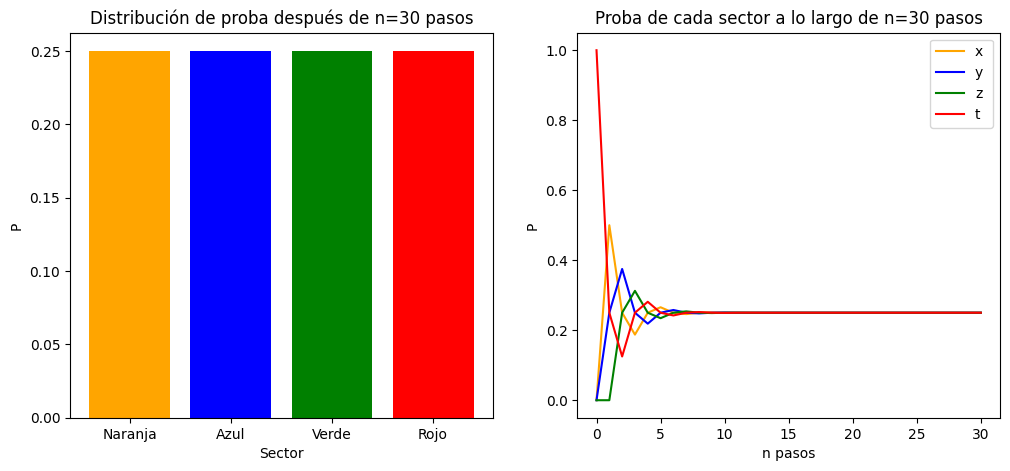

In [31]:
# Usamos las últimas probabilididades o las del paso que deseemos
PF = [x[-1], y[-1], z[-1], t[-1]]
labels = ['Naranja', 'Azul', 'Verde', 'Rojo']

# Creamos 2 gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de barras
ax1.bar(labels, PF, color=['Orange', 'Blue', 'Green', 'Red'])
ax1.set_xlabel('Sector')
ax1.set_ylabel('P')
ax1.set_title('Distribución de proba después de n=30 pasos')

# Grafica de las probabilidades al paso de las tiradas
ax2.plot(x, label='x ',color='Orange')
ax2.plot(y, label='y', color='Blue')
ax2.plot(z, label='z', color='Green')
ax2.plot(t, label='t', color='Red')
ax2.set_xlabel('n pasos')
ax2.set_ylabel('P')
ax2.set_title('Proba de cada sector a lo largo de n=30 pasos')
ax2.legend()

plt.show()

Podemos ver que todos los sectores tuvieron la misma probabilidad después de 30 tiradas, pero si vemos la grafica o la tabla de la probabilidad despues de n lanzamientos, podemos ver que después de 12 rondas, aproximadamente, ya todos los sectores fueron igualmente probables.